<a href="https://colab.research.google.com/github/Zeeshan2012/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HEALTH INSURANCE CROSS SELL PREDICTION/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#make a Dataset Copy
df= data.copy()

In [8]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
#check for rows and columns
df.shape

(381109, 12)

There are around 381109 rows and 12 columns in the Dataset

In [ ]:
#check for Null Values and Duplicate values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df[df.duplicated()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


There are non Null and Duplicate Values

In [ ]:
#check Statics
df.describe(include= 'all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


From the Above Stats we can say Driving License previously insured and Response are having Categorical values 0 and 1

In [9]:
#Check for irrelevant columns
# We can drop the ID column as it is just work as a index
df.drop(['id'], axis = 1, inplace = True)

In [10]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

Text(0.5, 1.0, 'Count of Boys and Girls')

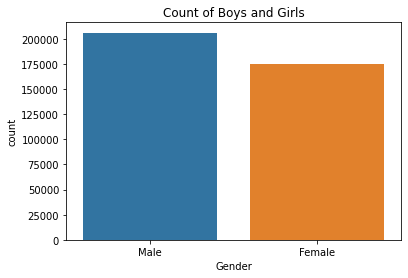

In [ ]:
# check the Statics of Males and Females
sns.countplot(df['Gender'])
plt.title('Count of Boys and Girls')

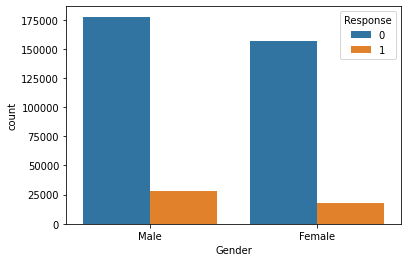

In [ ]:
#now check for how many are intrested or not intrested
sns.countplot(x= 'Gender', hue = 'Response', data = df)

The total number of males are more than 20000 where as girls are around 175000.

the intrested males are around 175000 and not intrested stands at 25000.

for Females its around 150000 intrested and less than 25000 for not intrested

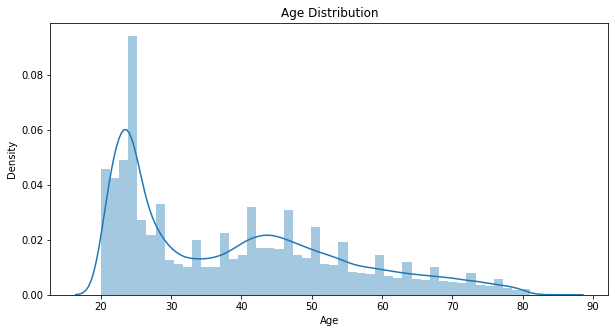

In [ ]:
# check for Data Distribution
fig = plt.figure(figsize = (10,5))
sns.distplot(df['Age'])
plt.title('Age Distribution')
plt.show()

# The age column is Positively Skewed

check for outliers

In [ ]:
df['Age'].unique()

array([44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 37, 25, 42, 60, 65, 49,
       34, 51, 26, 57, 79, 48, 45, 72, 30, 54, 27, 38, 22, 78, 20, 39, 62,
       58, 59, 63, 50, 67, 77, 28, 69, 52, 31, 33, 43, 36, 53, 70, 46, 55,
       40, 61, 75, 64, 35, 66, 68, 74, 73, 84, 83, 81, 80, 82, 85])

Text(0.5, 1.0, 'Age Boxplot')

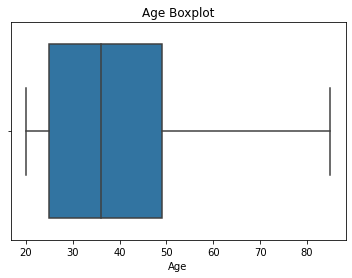

In [ ]:
sns.boxplot(df['Age'])
plt.title('Age Boxplot')

Text(0.5, 1.0, 'Age Distribution with Response')

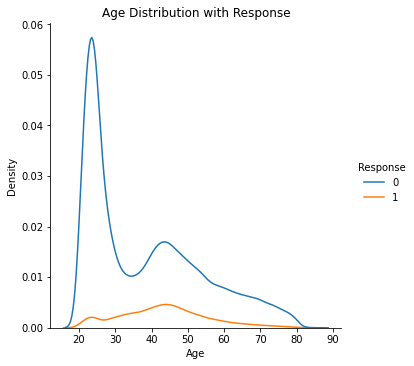

In [ ]:
sns.displot(x = 'Age', hue = 'Response', data= df, kind = 'kde')
plt.title('Age Distribution with Response')

From the above graph we can say, Age 40 to 50 years people are intrested

#DRIVING LICENSE

In [ ]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Text(0.5, 0, 'Driving License')

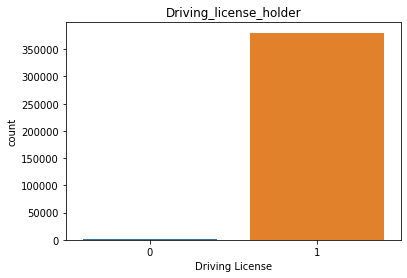

In [ ]:
sns.countplot(df['Driving_License'])
plt.title('Driving_license_holder')
plt.xlabel("Driving License")

[Text(0, 0, 'without DL'), Text(0, 0, 'DL')]

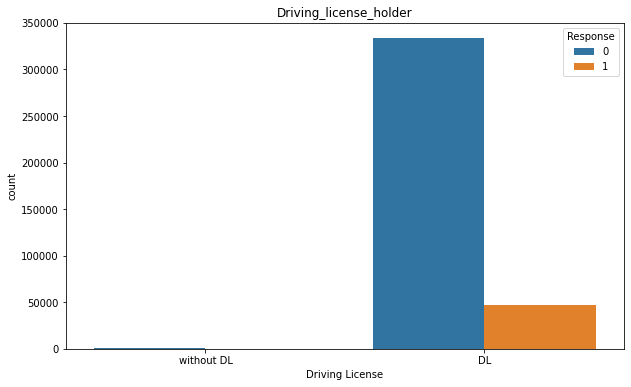

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.gca()
sns.countplot(df['Driving_License'], hue=df['Response'])
plt.title('Driving_license_holder')
plt.xlabel("Driving License")
ax.xaxis.set_ticklabels(['without DL','DL'])

From the graph we can see the number of Without DL Customer is low and most of the customers with DL are uninterested

In [ ]:
#count the number of intrested customer with or without License
df.groupby('Driving_License')['Response'].value_counts()

Driving_License  Response
0                0              771
                 1               41
1                0           333628
                 1            46669
Name: Response, dtype: int64

Only 41 of the 812 customers without DL are interested in vehicle insurance.

We can also explore the age-wise distribution of people with DL in order to compare it with our earlier plot of age-wise distribution of response.

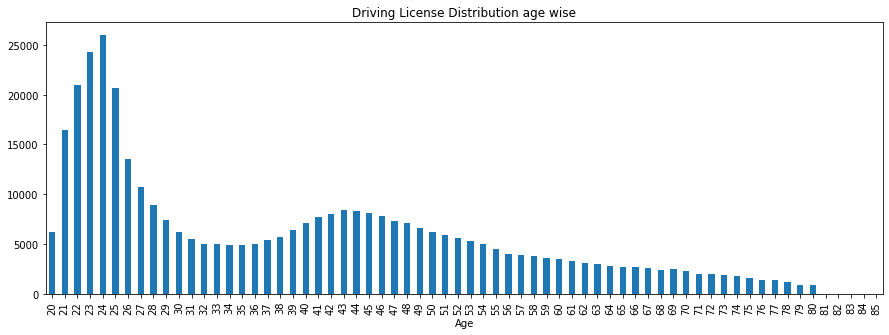

In [ ]:
#Distribution graph of Driving license holder Age wise
plt.figure(figsize = (15,5))
df.groupby('Age')['Driving_License'].sum().plot(kind = 'bar')
plt.title('Driving License Distribution age wise')
plt.show()

The count of Driving license holder is low for older customer this might be the reason  for low number of customer not intrested in that section.

# Previously_Insured

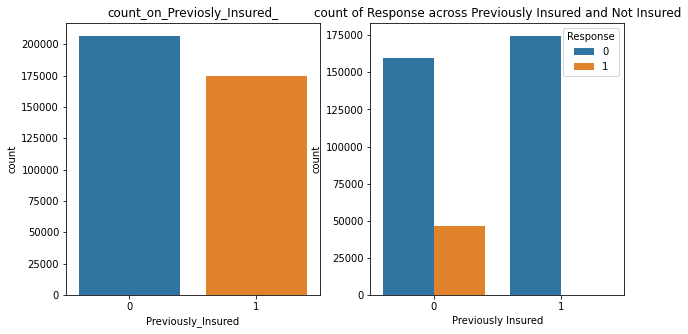

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(df['Previously_Insured'])
plt.title('count_on_Previosly_Insured_')

plt.subplot(1,2,2)
sns.countplot(x = 'Previously_Insured', hue = 'Response', data = df)
plt.title('count of Response across Previously Insured and Not Insured')
plt.xlabel("Previously Insured")
plt.show()

We can see that out of the customers who have already insured, almost no one is interested in the vehicle insurance. 

In [ ]:
#check the number of previously insured people who are still interested.
df.groupby('Previously_Insured')['Response'].sum()

Previously_Insured
0    46552
1      158
Name: Response, dtype: int64

only 158 customer out of previosly insured customer are still intreseted

# Age of Vehicle

In [ ]:
df['Vehicle_Age'].unique()
# count of each categories
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

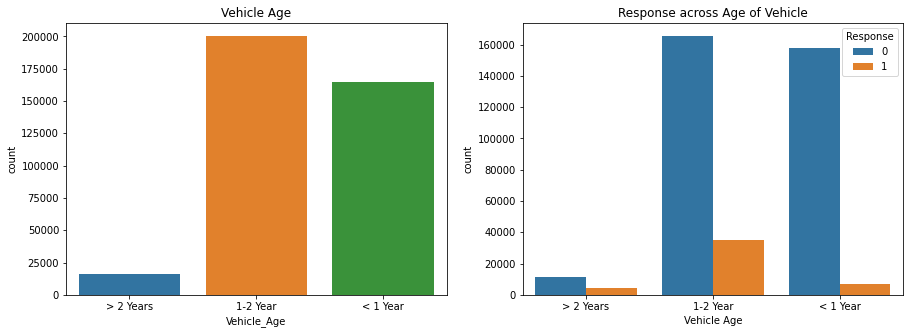

In [ ]:
#graph
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(df['Vehicle_Age'])
plt.title('Vehicle Age')

#Response wise graph
plt.subplot(1,2,2)
sns.countplot(x = 'Vehicle_Age', hue = 'Response', data = df)
plt.title("Response across Age of Vehicle")
plt.xlabel('Vehicle Age')

plt.show()


In [ ]:
df.groupby('Response')['Vehicle_Age'].value_counts()

Response  Vehicle_Age
0         1-2 Year       165510
          < 1 Year       157584
          > 2 Years       11305
1         1-2 Year        34806
          < 1 Year         7202
          > 2 Years        4702
Name: Vehicle_Age, dtype: int64

for vehicle age 1-2 years category, the number of interested customers is 34806 and uninterested customers is 165510 while in case of vehicle age >2 years category, interested customers is only 4702 and uninterested customers is 11305. 

# Annual Premium

<Figure size 648x504 with 0 Axes>

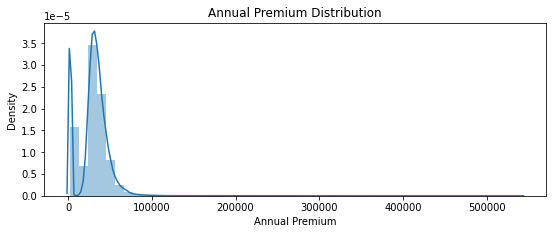

<Figure size 648x504 with 0 Axes>

In [ ]:
plt.figure(figsize = (9,7))

# distribution of annual premium
plt.subplot(2,1,1)
sns.distplot(data['Annual_Premium'])
plt.title('Annual Premium Distribution')
plt.xlabel("Annual Premium")
plt.figure(figsize = (9,7))

In [ ]:
data['Annual_Premium'].value_counts().sort_values(ascending = False)

2630.0      64877
69856.0       140
39008.0        41
38287.0        38
45179.0        38
            ...  
16882.0         1
102370.0        1
15647.0         1
51800.0         1
69845.0         1
Name: Annual_Premium, Length: 48838, dtype: int64

There are a lot of customers paying annual premium of 2630 leading to the peak near zero.

Text(0.5, 6.79999999999999, 'Annual Premium')

<Figure size 720x360 with 0 Axes>

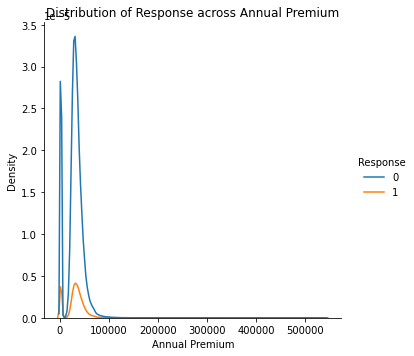

In [ ]:
# density estimation using kde
# distribution of interested and uninterested response across annual premium
plt.figure(figsize = (10,5))
sns.displot(x = 'Annual_Premium', hue = 'Response', data = data, kind = 'kde')
plt.title('Distribution of Response across Annual Premium')
plt.xlabel("Annual Premium")

Both responses have similar distribution but with the Uninterested customers distribution having much higher magnitude.

In [ ]:
df['Policy_Sales_Channel']

0          26.0
1          26.0
2          26.0
3         152.0
4         152.0
          ...  
381104     26.0
381105    152.0
381106    160.0
381107    124.0
381108     26.0
Name: Policy_Sales_Channel, Length: 381109, dtype: float64

Text(0.5, 0, 'Policy Sales Channel')

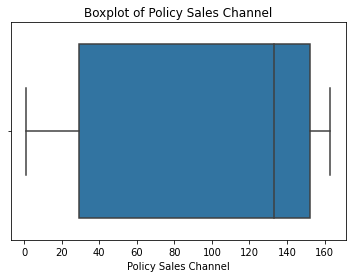

In [ ]:
sns.boxplot(df['Policy_Sales_Channel'])
plt.title('Boxplot of Policy Sales Channel')
plt.xlabel("Policy Sales Channel")

There are no oultiers in Policy Sales Channel

Text(0.5, 0, 'Policy Sales Channel')

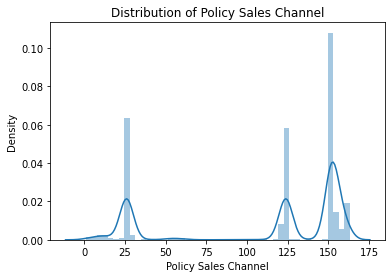

In [ ]:
sns.distplot(df['Policy_Sales_Channel'])
plt.title('Distribution of Policy Sales Channel')
plt.xlabel("Policy Sales Channel")

There are multiple peaks in the distribution.

Text(0.5, 6.79999999999999, 'Policy Sales Channel')

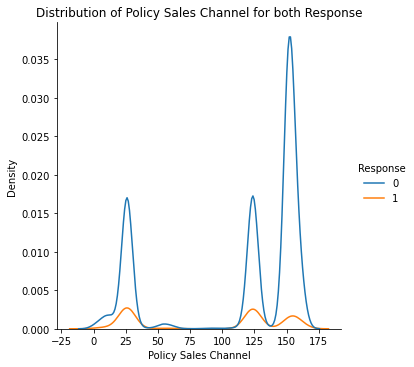

In [ ]:
# density estimation using kde
# distribution of interested and uninterested response across Policy Sales Channel
sns.displot(x = 'Policy_Sales_Channel', hue = 'Response', data = df, kind = 'kde')
plt.title('Distribution of Policy Sales Channel for both Response')
plt.xlabel("Policy Sales Channel")

Both responses have similar distribution pattern with the Uninterested customers distribution having much higher magnitude. This implies a few of the policy channels are the most common ones for the customers (regardless of if they're interested or not).

#Vintage
It refers to the number of days the customer has been associated with the company.

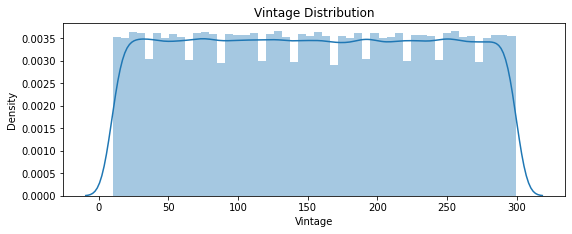

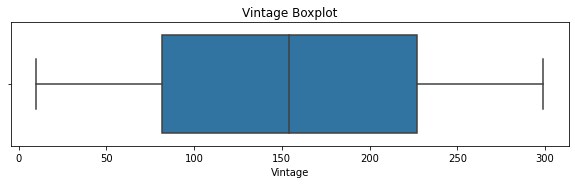

In [ ]:
plt.figure(figsize = (9,7))
# distribution plot
plt.subplot(2,1,1)
sns.distplot(df['Vintage'])
plt.title('Vintage Distribution')
plt.figure(figsize = (10,5))
# boxplot
plt.subplot(2,1,2)
sns.boxplot(df['Vintage'])
plt.title('Vintage Boxplot')
plt.show()

The distribution of customers across vintage is almost uniform. We observe no outliers as well.

#Vehicle Damage
Refers to whether the customer got his/her vehicle damaged in the past or not.

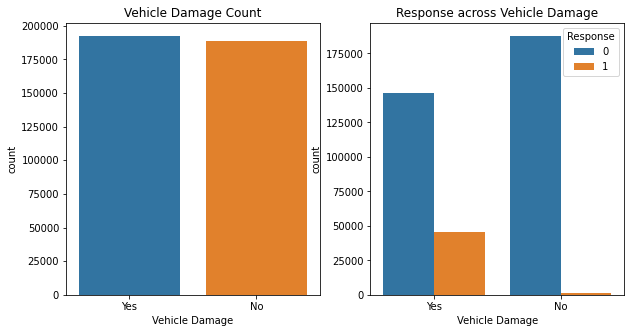

In [ ]:
plt.figure(figsize = (10,5))
# count plot of vehicle damaged and not damaged
plt.subplot(1,2,1)
sns.countplot(df['Vehicle_Damage'])
plt.title("Vehicle Damage Count")
plt.xlabel("Vehicle Damage")

# plot of response across vehicle damage
plt.subplot(1,2,2)
sns.countplot(df['Vehicle_Damage'], hue = df['Response'])
plt.title("Response across Vehicle Damage")
plt.xlabel("Vehicle Damage")
plt.show()

The number of customers who had their vehicle damaged in the past and that of customers who did not have it damaged is around the same.

Most of the customers who did not have their vehicle damaged are not interested in the insurance (almost no customers are interested). While in case of customers who did have their vehicle damaged, close to 50,000 people are interested in the insurance.

In [11]:
# crosstabulation between vehicle damage and response
pd.crosstab(df['Vehicle_Damage'],df['Response']).rename(columns = {0:'Not Interested',1:'Interested'})

Response,Not Interested,Interested
Vehicle_Damage,,
No,187714,982
Yes,146685,45728


We can see that out of the customers who did not have their vehicle damaged in the past, only 982 are interested.

#Multicollinearity
Multicollinearity can be a problem for logistic regression (but Decision Tree, Random Forest etc. are not affected). We can look for multicollinearity between the variables by plotting a correlation heatmap.

Text(0.5, 1.05, 'Correlation Heatmap')

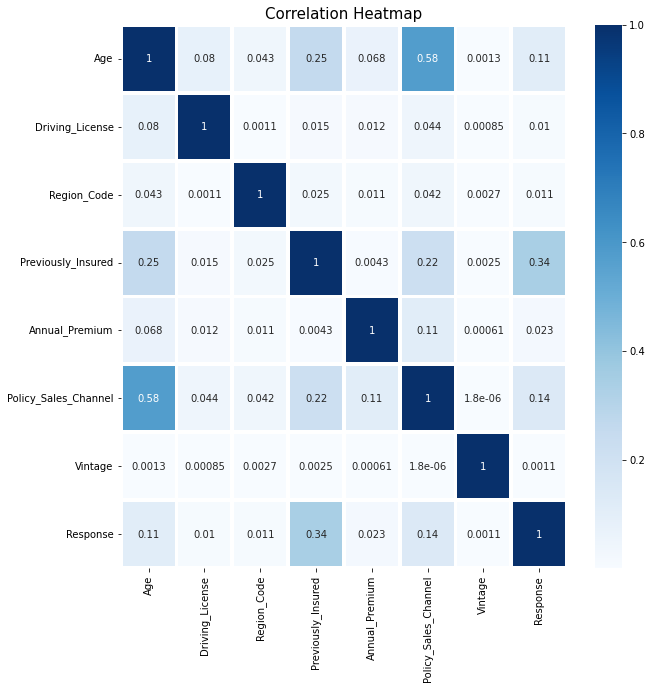

In [12]:
corr = df.corr()
plt.figure(figsize = (10,10))
# plotting the heatmap
sns.heatmap(abs(corr), annot=True,linewidths=3,cmap = 'Blues')
plt.title("Correlation Heatmap", y=1.05, size=15)

None of the variables have high correlation with each other.

#Feature Engineering
Encoding
Let us have a look at the categorical variables

In [ ]:
# information on categorical veriables
df.describe(include = 'object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


Gender and Vehical damage are binary Categorical variables So we can replace those with 0 and 1 Numerical Values

In [ ]:
# looking at some of the data
df[['Gender','Vehicle_Damage']].head()

,Gender,Vehicle_Damage
0,Male,Yes
1,Male,No
2,Male,Yes
3,Male,No
4,Female,No


In [13]:
from sklearn.preprocessing import LabelEncoder
# converting binary categorical variables to numerical form
labelEncoder= LabelEncoder()
df['Gender'] = labelEncoder.fit_transform(df['Gender'])
df['Vehicle_Damage'] = labelEncoder.fit_transform(df['Vehicle_Damage'])

In [ ]:
df[['Gender','Vehicle_Damage']].head()

,Gender,Vehicle_Damage
0,1,1
1,1,0
2,1,1
3,1,0
4,0,0


Now for Vehicle_Age We will use Dummy variables

In [ ]:
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [14]:
# We have to remove one of the dummy variables using drop_first as that information is already present
df = pd.get_dummies(df, columns = ['Vehicle_Age'], drop_first = True)

In [15]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,1
1,1,76,1,3.0,0,0,33536.0,26.0,183,0,0,0
2,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,1
3,1,21,1,11.0,1,0,28619.0,152.0,203,0,1,0
4,0,29,1,41.0,1,0,27496.0,152.0,39,0,1,0


Now We have to divide the data equally by SMOTE method

In [50]:
# classes in the target variable
data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

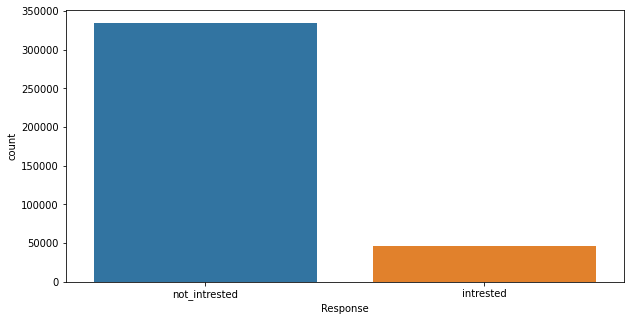

In [16]:
# Response is our Target or Dependent variable
fig = plt.figure(figsize = (10,5))
axes = fig.gca()
sns.countplot(df['Response'])
axes.xaxis.set_ticklabels(['not_intrested','intrested'])
plt.show()


In [19]:
# dataset of independent variables
X = df.drop(['Response'], axis = 1)
# target dependent variables
y = df['Response']

In [51]:
from imblearn.over_sampling import SMOTE
# perform smote
smote = SMOTE()
# resample the dataset to balance it
X_new, y_new = smote.fit_resample(X,y)

In [52]:
print('Original Data Response Class Counts')
print(y.value_counts())
print('Resampled Data Response Class Counts')
print(y_new.value_counts())

Original Data Response Class Counts
0    334399
1     46710
Name: Response, dtype: int64
Resampled Data Response Class Counts
1    334399
0    334399
Name: Response, dtype: int64


Text(0.5, 1.0, 'Resampled Data Response Class Counts')

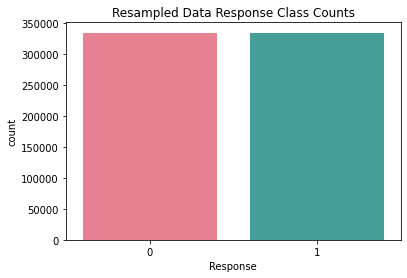

In [53]:
# plot target variable class count
sns.countplot(y_new,palette='husl')
plt.title('Resampled Data Response Class Counts')

#Training and Testing sets
Split the data into training and testing sets.

In [22]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.3, random_state = 42)

# printing shape
print('X_train shape {}'.format(X_train.shape))
print('y_train shape {}'.format(y_train.shape))
print('X_test shape {}'.format(X_test.shape))
print('y_test shape {}'.format(y_test.shape))

X_train shape (468158, 11)
y_train shape (468158,)
X_test shape (200640, 11)
y_test shape (200640,)


#Model Selection
This is a Binary Classification problem as we are attempting to predict whether the customers of the health insurance would also be interested in the vehicle insurance or not.
We are going to build multiple classification models:
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier


#Logistic Regression
We can use the Logistic Regression model from Scikit-learn. We will also perform hyperparameter tuning and cross validation with GridSearchCV.

In [55]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
classifier = LogisticRegression()

# hyperparameter tuning and crossvalidation
parameters = {"penalty":['l1', 'l2', 'elasticnet', 'none'],"max_iter":[100,200,300]}
clf = GridSearchCV(classifier, param_grid = parameters, scoring = 'accuracy', cv = 3)
# fitting the model
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy')

In [56]:
# best hyperparameter combination
clf.best_params_

{'max_iter': 200, 'penalty': 'l2'}

In [64]:
# class prediction on training and testing datasets
y_test_pred_lr = clf.predict(X_test)
y_train_pred_lr = clf.predict(X_train)

# probability prediction on training and testing datasets (only using probabilities of positive class)
y_test_prob_lr = clf.predict_proba(X_test)[:,1]
y_train_prob_lr = clf.predict_proba(X_train)[:,1]

In [61]:
y_test_pred_lr

array([1, 1, 0, ..., 1, 1, 0])

In [65]:
y_test_prob_lr

array([0.67058251, 0.67361809, 0.00731058, ..., 0.85319705, 0.68052159,
       0.00550363])

#Model Performance
The model can be evaluated using several metrics such as accuracy, precision, recall etc.

We can also create ROC curves (and calculate the area under the curves) which represent the classification ability of a model.

In [70]:
from sklearn.metrics import classification_report,accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# model performance on testing data
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
test_precision_lr = precision_score(y_test, y_test_pred_lr)
test_recall_lr = recall_score(y_test, y_test_pred_lr)
test_f1_lr = f1_score(y_test, y_test_pred_lr)
# area under roc curve
test_roc_auc_score_lr = roc_auc_score(y_test, y_test_prob_lr)

In [71]:
#print performance metrics of testing data
print('Logistic Regression Testing Data Performance')
print("Accuracy : ", test_accuracy_lr)
print("Precision:", test_precision_lr)
print("Recall:", test_recall_lr)
print("F1-Score:", test_f1_lr)
print("Area Under the ROC Curve:", test_roc_auc_score_lr)

Logistic Regression Testing Data Performance
Accuracy :  0.7963068181818181
Precision: 0.7323483803601624
Recall: 0.935117010268248
F1-Score: 0.8214040684335875
Area Under the ROC Curve: 0.8754375680651167


In [72]:
#model performance on training data
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
train_precision_lr = precision_score(y_train, y_train_pred_lr)
train_recall_lr = recall_score(y_train, y_train_pred_lr)
train_f1_lr = f1_score(y_train, y_train_pred_lr)
# area under roc curve
train_roc_auc_score_lr = roc_auc_score(y_train, y_train_prob_lr)

In [73]:
#print performance metrics of training data
print('Logistic Regression Training Data Performance')
print("Accuracy : ", train_accuracy_lr)
print("Precision:", train_precision_lr)
print("Recall:", train_recall_lr)
print("F1-Score:", train_f1_lr)
print("Area Under the ROC Curve:", train_roc_auc_score_lr)

Logistic Regression Training Data Performance
Accuracy :  0.793326184749593
Precision: 0.7283982692634376
Recall: 0.9349451677034567
F1-Score: 0.8188476617351351
Area Under the ROC Curve: 0.8732623319946817


The model performance on testing and training datasets are fairly similar. It gives around 79% accuracy, 72% precision and 93% recall. It has an F1 score of 0.82 and the area under ROC curve is 0.87.

#Classification Report
Classification report presents the main classification metrics in a tabular form.

In [74]:
print('Logistic Regression Testing Data')
print(classification_report(y_test, y_test_pred_lr))
print('Logistic Regression Training Data')
print(classification_report(y_train, y_train_pred_lr))

Logistic Regression Testing Data
              precision    recall  f1-score   support

           0       0.91      0.66      0.76    100136
           1       0.73      0.94      0.82    100504

    accuracy                           0.80    200640
   macro avg       0.82      0.80      0.79    200640
weighted avg       0.82      0.80      0.79    200640

Logistic Regression Training Data
              precision    recall  f1-score   support

           0       0.91      0.65      0.76    234263
           1       0.73      0.93      0.82    233895

    accuracy                           0.79    468158
   macro avg       0.82      0.79      0.79    468158
weighted avg       0.82      0.79      0.79    468158



Receiver operating characteristic (ROC) curve
We will plot the ROC curve for both testing and training datasets. The area under the curves were calculated earlier and was found to be around 0.87 (87%) for both testing and training set.

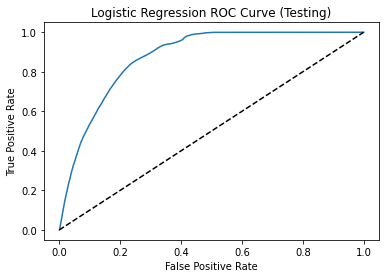

In [76]:
from sklearn.metrics import roc_curve
# Receiver operating characteristic (ROC) for testing data
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_lr)
# plot ROC curve
plt.title('Logistic Regression ROC Curve (Testing)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
plt.show()

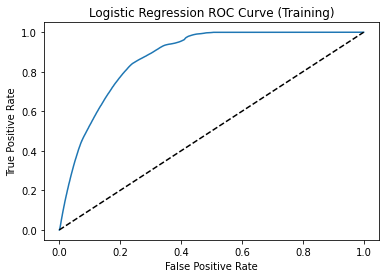

In [77]:
# Receiver operating characteristic (ROC) for training data
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob_lr)
# plot ROC curve
plt.title('Logistic Regression ROC Curve (Training)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
plt.show()

The performance of the model was found to be similar on both testing and training sets. So, the ROC curves are also similar (with same area under the curve).

#Confusion Matrix
The prediction results are summarized in the form of confusion matrices for both testing and training sets.

In [79]:
from sklearn.metrics import confusion_matrix

[[65788 34348]
 [ 6521 93983]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

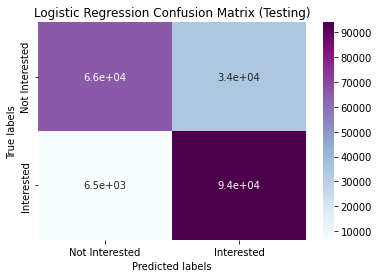

In [80]:
# confusion matrix for testing set
cm_test_lr = confusion_matrix(y_test, y_test_pred_lr)
print(cm_test_lr)

ax = plt.subplot()
sns.heatmap(cm_test_lr, annot = True, cmap = 'BuPu', ax = ax)

labels = ['Not Interested', 'Interested']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Confusion Matrix (Testing)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[152723  81540]
 [ 15216 218679]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

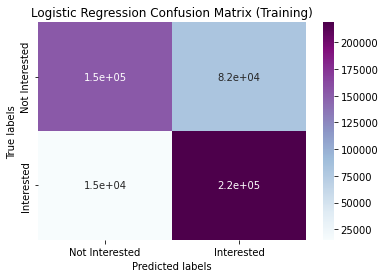

In [81]:
# confusion matrix for training set
cm_train_lr = confusion_matrix(y_train, y_train_pred_lr)
print(cm_train_lr)

ax = plt.subplot()
sns.heatmap(cm_train_lr, annot = True, cmap = 'BuPu', ax = ax)

labels = ['Not Interested', 'Interested']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Confusion Matrix (Training)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#Decision Tree Classifier
Next, we build a Decision Tree Classifier and do hyperparameter tuning and cross validation as well.

In [82]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier(criterion = 'entropy', random_state = 32)

# hyperparameter tuning and cross validation
parameters = {'max_depth':[7,9,11], 'splitter':['best','random'], 'min_samples_split':[2,4]}
decisiontree = GridSearchCV(dtmodel, param_grid = parameters, scoring = 'accuracy', cv = 3)
# fitting the model
decisiontree.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=32),
             param_grid={'max_depth': [7, 9, 11], 'min_samples_split': [2, 4],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [83]:
# best hyperparameters
decisiontree.best_params_

{'max_depth': 11, 'min_samples_split': 4, 'splitter': 'best'}

In [84]:
# best accuracy score
decisiontree.best_score_

0.8393320217490426

In [85]:
# class predictions
y_pred_dt = decisiontree.predict(X_test)
y_train_pred_dt = decisiontree.predict(X_train)

# probability predictions (only of positive outcomes)
y_prob_dt = decisiontree.predict_proba(X_test)[:,1]
y_train_prob_dt = decisiontree.predict_proba(X_train)[:,1]

#Model Performance
We evaluated the model using the usual performance metrics.

In [86]:
# model performance on testing data
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)
test_precision_dt = precision_score(y_test, y_pred_dt)
test_recall_dt = recall_score(y_test, y_pred_dt)
test_f1_dt = f1_score(y_test, y_pred_dt)
# area under roc curve
test_roc_auc_score_dt = roc_auc_score(y_test, y_prob_dt)

#model performance on training data
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
train_precision_dt = precision_score(y_train, y_train_pred_dt)
train_recall_dt = recall_score(y_train, y_train_pred_dt)
train_f1_dt = f1_score(y_train, y_train_pred_dt)
# area under roc curve
train_roc_auc_score_dt = roc_auc_score(y_train, y_train_prob_dt)

In [87]:
#print performance metrics of testing data
print('Decision Tree Testing Data Performance')
print("Accuracy : ", test_accuracy_dt)
print("Precision:", test_precision_dt)
print("Recall:", test_recall_dt)
print("F1-Score:", test_f1_dt)
print("Area Under the ROC Curve:", test_roc_auc_score_dt)

Decision Tree Testing Data Performance
Accuracy :  0.842633572567783
Precision: 0.8003328801979853
Recall: 0.913824325399984
F1-Score: 0.8533215646195298
Area Under the ROC Curve: 0.9162971979158254


In [88]:
#print performance metrics of training data
print('Decision Tree Training Data Performance')
print("Accuracy : ", train_accuracy_dt)
print("Precision:", train_precision_dt)
print("Recall:", train_recall_dt)
print("F1-Score:", train_f1_dt)
print("Area Under the ROC Curve:", train_roc_auc_score_dt)

Decision Tree Training Data Performance
Accuracy :  0.8415492205622888
Precision: 0.7976813971259762
Recall: 0.9148977105111268
F1-Score: 0.8522781583559025
Area Under the ROC Curve: 0.9166660885310991


The model performance on testing and training datasets are fairly similar. For both testing and training data, it gives around 84% accuracy, 80% precision and 91% recall. It has an F1 score of 0.85 and the area under ROC curve is 0.91.

#Classification report

In [89]:
print('Decision Tree Testing Data')
print(classification_report(y_test, y_pred_dt))
print('Decision Tree Training Data')
print(classification_report(y_train, y_train_pred_dt))

Decision Tree Testing Data
              precision    recall  f1-score   support

           0       0.90      0.77      0.83    100136
           1       0.80      0.91      0.85    100504

    accuracy                           0.84    200640
   macro avg       0.85      0.84      0.84    200640
weighted avg       0.85      0.84      0.84    200640

Decision Tree Training Data
              precision    recall  f1-score   support

           0       0.90      0.77      0.83    234263
           1       0.80      0.91      0.85    233895

    accuracy                           0.84    468158
   macro avg       0.85      0.84      0.84    468158
weighted avg       0.85      0.84      0.84    468158



Receiver operating characteristic (ROC) Curve


The ROC curve is plotted for both testing and training datasets. The area under the curves were calculated earlier and was found to be around 0.87 for both testing and training set.

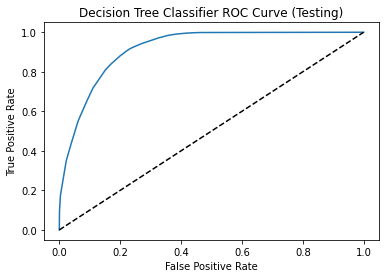

In [90]:
# Receiver operating characteristic (ROC) for testing data
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
# plot ROC curve
plt.title('Decision Tree Classifier ROC Curve (Testing)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
plt.show()

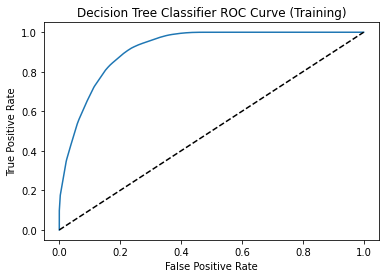

In [91]:
# Receiver operating characteristic (ROC) for training data
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob_dt)
# plot ROC curve
plt.title('Decision Tree Classifier ROC Curve (Training)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
plt.show()

The performance of the model was found to be similar on both testing and training sets. So, the ROC curves are also similar (with same area under the curve).

#Confusion matrix
Confusion matrices that summarized the predictions were constructed.

[[77223 22913]
 [ 8661 91843]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

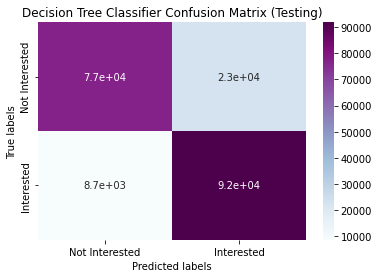

In [92]:
# confusion matrix for testing set
cm_test_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_test_dt)

ax = plt.subplot()
sns.heatmap(cm_test_dt, annot = True, cmap = 'BuPu', ax = ax)

labels = ['Not Interested', 'Interested']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Classifier Confusion Matrix (Testing)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[179988  54275]
 [ 19905 213990]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

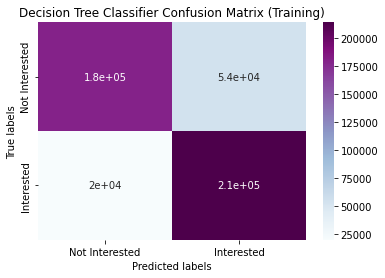

In [93]:
# confusion matrix for training set
cm_train_dt = confusion_matrix(y_train, y_train_pred_dt)
print(cm_train_dt)

ax = plt.subplot()
sns.heatmap(cm_train_dt, annot = True, cmap = 'BuPu', ax = ax)

labels = ['Not Interested', 'Interested']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Classifier Confusion Matrix (Training)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#Random Forest Classifier
Next we can build a Random Forest classifier. Random Forest is a tree ensemble model whose single model itself takes a good amount of time to run (due to the large data). We chose to not perform hyperparameter tuning and cross validation as that led to unreasonably long running times.

In [115]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state = 71, max_depth = 11, min_samples_split = 4, n_jobs = -1, criterion = 'entropy', n_estimators = 100)
# fitting the model
randomforest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_split=4,
                       n_jobs=-1, random_state=71)

In [95]:
# class predictions
y_pred_rf = randomforest.predict(X_test)
y_train_pred_rf = randomforest.predict(X_train)

# probability predictions (only of positive outcomes)
y_prob_rf = randomforest.predict_proba(X_test)[:,1]
y_train_prob_rf = randomforest.predict_proba(X_train)[:,1]

#Model Performance
we evaluated the model using the usual metrics.

In [96]:
# model performance on testing data
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
test_precision_rf = precision_score(y_test, y_pred_rf)
test_recall_rf = recall_score(y_test, y_pred_rf)
test_f1_rf = f1_score(y_test, y_pred_rf)
# area under roc curve
test_roc_auc_score_rf = roc_auc_score(y_test, y_prob_rf)

#model performance on training data
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf)
train_recall_rf = recall_score(y_train, y_train_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf)
# area under roc curve
train_roc_auc_score_rf = roc_auc_score(y_train, y_train_prob_rf)

In [97]:
#print performance metrics of testing data
print('Random Forest Classifier Testing Data Performance')
print("Accuracy : ", test_accuracy_rf)
print("Precision:", test_precision_rf)
print("Recall:", test_recall_rf)
print("F1-Score:", test_f1_rf)
print("Area Under the ROC Curve:", test_roc_auc_score_rf)

Random Forest Classifier Testing Data Performance
Accuracy :  0.8403508771929824
Precision: 0.7905295315682281
Recall: 0.9268884820504657
F1-Score: 0.8532957168504746
Area Under the ROC Curve: 0.9169081891340505


In [98]:
#print performance metrics of training data
print('Random Forest Classifier Training Data Performance')
print("Accuracy : ", train_accuracy_rf)
print("Precision:", train_precision_rf)
print("Recall:", train_recall_rf)
print("F1-Score:", train_f1_rf)
print("Area Under the ROC Curve:", train_roc_auc_score_rf)

Random Forest Classifier Training Data Performance
Accuracy :  0.8399536054067217
Precision: 0.7887282502088706
Recall: 0.9283182624682016
F1-Score: 0.8528491609140096
Area Under the ROC Curve: 0.9165415349215678


The model performance on testing and training datasets are fairly similar.

For both testing and training data, it gives around 84% accuracy, 79% precision and 92% recall. It has an F1 score of 0.85 and the area under ROC curve is 0.91.

#Classification Report
Classification report presenting all the main performance metrics was created.

In [99]:
print('Random Forest Classifier Testing Data')
print(classification_report(y_test, y_pred_rf))
print('Random Forest Classifier Training Data')
print(classification_report(y_train, y_train_pred_rf))

Random Forest Classifier Testing Data
              precision    recall  f1-score   support

           0       0.91      0.75      0.82    100136
           1       0.79      0.93      0.85    100504

    accuracy                           0.84    200640
   macro avg       0.85      0.84      0.84    200640
weighted avg       0.85      0.84      0.84    200640

Random Forest Classifier Training Data
              precision    recall  f1-score   support

           0       0.91      0.75      0.82    234263
           1       0.79      0.93      0.85    233895

    accuracy                           0.84    468158
   macro avg       0.85      0.84      0.84    468158
weighted avg       0.85      0.84      0.84    468158



#Receiver operating characteristic (ROC) Curve
The ROC curve is plotted for both testing and training datasets. The area under the curves were calculated earlier and was found to be around 0.89 (89%) for both testing and training set.

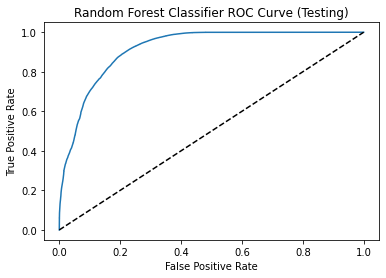

In [100]:
# Receiver operating characteristic (ROC) for testing data
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
# plot ROC curve
plt.title('Random Forest Classifier ROC Curve (Testing)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
plt.show()

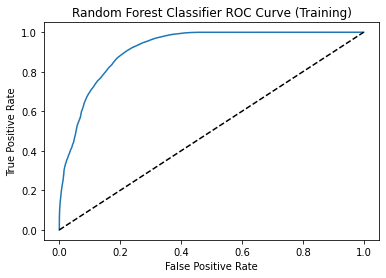

In [101]:
# Receiver operating characteristic (ROC) for training data
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob_rf)
# plot ROC curve
plt.title('Random Forest Classifier ROC Curve (Training)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
plt.show()

The performance of the model was found to be similar on both testing and training sets. So, the ROC curves are also similar (with same area under the curve).

#Confusion Matrix

[[75452 24684]
 [ 7348 93156]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

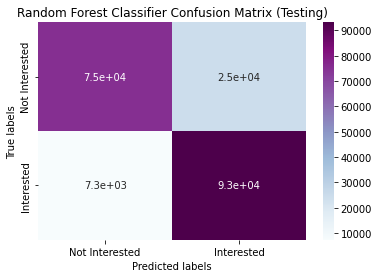

In [102]:
# confusion matrix for testing set
cm_test_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_test_rf)

ax = plt.subplot()
sns.heatmap(cm_test_rf, annot = True, cmap = 'BuPu', ax = ax)

labels = ['Not Interested', 'Interested']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest Classifier Confusion Matrix (Testing)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[176102  58161]
 [ 16766 217129]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

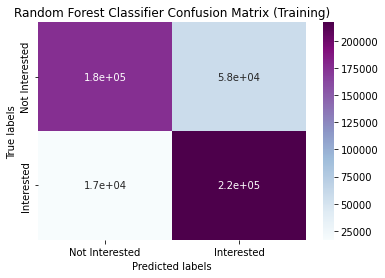

In [103]:
# confusion matrix for training set
cm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
print(cm_train_rf)

ax = plt.subplot()
sns.heatmap(cm_train_rf, annot = True, cmap = 'BuPu', ax = ax)

labels = ['Not Interested', 'Interested']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest Classifier Confusion Matrix (Training)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#Feature Importance
Let us find the most important features that contributed to the impurity reduction in the random forest model.

Text(0.5, 0, 'Relative Importance')

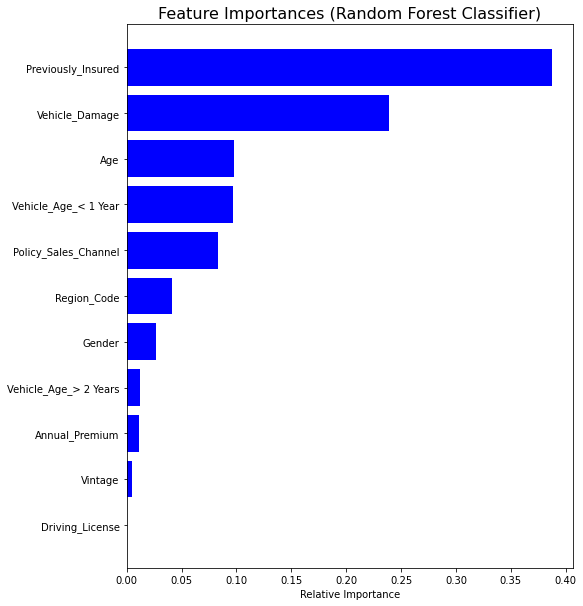

In [104]:
features = X.columns
# feature importance (array of importance value of each feature, values sum to 1)
importances = randomforest.feature_importances_
# indices
index = np.argsort(importances)

# plotting
plt.figure(figsize=(8,10))
plt.title('Feature Importances (Random Forest Classifier)', fontsize = 16)
plt.barh(range(len(index)), importances[index], color='blue', align='center')
plt.yticks(range(len(index)), features[index])
plt.xlabel('Relative Importance')

Previously Insured followed by Vehicle damage and Age features are the most important contributers. Vintage and Driving License are least important.


In [105]:
model_names = ['Logistic Regression','Decision Tree','Random Forest']
model_metrics ={"Accuracy":[test_accuracy_lr, test_accuracy_dt, test_accuracy_rf],"Recall":[test_recall_lr,test_recall_dt,test_recall_rf],"Precision":[test_precision_lr,test_precision_dt,test_precision_rf],
    'f1_score':[test_f1_lr,test_f1_dt,test_f1_rf],"ROC_AUC_Score":[test_roc_auc_score_lr,test_roc_auc_score_dt,test_roc_auc_score_rf,test_roc_auc_score_xgb]}
# dataframe for model metrics
results = pd.DataFrame(data = model_metrics,index = model_names)
results

,Accuracy,Recall,Precision,f1_score,ROC_AUC_Score
Logistic Regression,0.796307,0.935117,0.732348,0.821404,0.875438
Decision Tree,0.842634,0.913824,0.800333,0.853322,0.916297
Random Forest,0.840351,0.926888,0.790530,0.853296,0.916908


Since the classes are balanced in our data, we can safely consider accuracy metric for comparing the models. The area under ROC and F1 score (harmonic mean of precision and recall) can also be used to make the comparison.

We can observe that the performance of all the models are close. But Decision Tree stands out in terms of accuracy (with a score of 0.842), F1 score (of 0.853) and area under ROC curve (score of 0.916). It is followed by Random Forest model. Interestingly, Random Forest and Decision Tree has similar performance (with Decision tree having slightly higher accuracy).

The Logistic Regression model might be the worst out of them all (but only by a small margin).

Since our dataset contained more than 600k records (after oversampling), we were not able to build SVM and KNN Classifiers. With the increase in data size, these models were having very long runtime.

#Conclusion
Customers aged between 30 to 50 are more interested in the vehicle insurance compared to the youngsters.
The chance of customers with out Driving License being interested in buying insurance is very low.
There is very low chance that a person who is previously insured is interested in the insurance.
Most of the customers pay annual premium below 100,000.
Number of men with driving license is higher than women in the data. This further results in the number of interested customers being higher in men than women.
Most of the customers whose vehicle wasn't damaged before are not interested in the insurance
There is no perfect multicollinearity between any of the independent variables.
XGBoost Classifier stands out with an accuracy score of 0.89 and area under ROC curve of 0.97.
The Random forest and decision tree classifier has almost similar performance (in terms of accuracy and ROC score).
The logistic regression model is the worst of them all (by a small margin).
There are some differences in the feature importances of Random Forest model and XGBoost model. But 'Previously Insured' followed by 'Vehicle Damage' are the most important features for both.